#### Creación de la muestra de entrenamiento y testing con sklearn para Equal Size Sampling 

Este es el primer modelo extra que se probará. En este caso, debido al desbalanceo de la variable atraso_15, se recurrirá al Equal Size Samplin, el cual consiste en tomar todos los casos 1 de la base de entrenamiento, contarlos y ese mismo número obtenerlo aleatoriamente de los casos 0 de la misma base. Entonces, la base de entrenamiento contará con la misma cantidad de casos 0 y 1 para ser presentada al algoritmo. En cambio la base de testing, mantiene el desbalance inicial. Se espera que con esto, el modelo sea mejor para detectar la clase minoritaria.

In [ ]:
# Importación de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

import missingno as msng
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

df = pd.read_csv('dataset_SCL_2.csv')

In [ ]:
df.head()

,Unnamed: 0,OPERA,MES,TIPOVUELO,SIGLADES,DIANOM,temporada_alta,periodo_dia,atraso_15,C_J_destinos,C_J_aerolineas
0,42405,Grupo LATAM,8,N,Antofagasta,Domingo,0,noche,0,2,1
1,65490,Grupo LATAM,12,N,Puerto Montt,Miercoles,1,mañana,0,2,1
2,37211,Grupo LATAM,7,I,Rosario,Sabado,1,mañana,1,3,1
3,8036,Sky Airline,2,N,Iquique,Viernes,1,noche,0,2,1
4,41039,Grupo LATAM,8,N,Antofagasta,Viernes,0,tarde,0,2,1


In [ ]:
# Se extrae la variable dependiente a un nuevo dataframe

atraso_15 = df['atraso_15']
atraso_15

0        0
1        0
2        1
3        0
4        0
        ..
68201    0
68202    0
68203    0
68204    0
68205    0
Name: atraso_15, Length: 68206, dtype: int64

In [ ]:
# El algoritmo que se utilizará será XGBoost, el cual requiere dicotomizar las variables categóricas

dummies = pd.concat([pd.get_dummies(df['OPERA'], prefix = 'OPERA'), pd.get_dummies(df['MES'], prefix = 'MES'), pd.get_dummies(df['TIPOVUELO'], prefix = 'TIPOVUELO'), 
                      pd.get_dummies(df['SIGLADES'], prefix = 'SIGLADES'), pd.get_dummies(df['DIANOM'], prefix = 'DIANOM'), pd.get_dummies(df['periodo_dia'], prefix = 'periodo_dia'),
                      pd.get_dummies(df['C_J_destinos'], prefix = 'C_J_destinos'), pd.get_dummies(df['C_J_aerolineas'], prefix = 'C_J_aerolineas')], axis = 1)

In [ ]:
dummies.head()

,OPERA_Aerolineas Argentinas,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,OPERA_British Airways,OPERA_Copa Air,...,periodo_dia_noche,periodo_dia_tarde,C_J_destinos_1,C_J_destinos_2,C_J_destinos_3,C_J_aerolineas_1,C_J_aerolineas_2,C_J_aerolineas_3,C_J_aerolineas_4,C_J_aerolineas_5
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [ ]:
# Se une a dummies la variable dependiente y luego se desordena el data frame

df = dummies.merge(atraso_15, how='inner', left_index=True, right_index=True)
df = shuffle(df, random_state = 111)
df

,OPERA_Aerolineas Argentinas,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,OPERA_British Airways,OPERA_Copa Air,...,periodo_dia_tarde,C_J_destinos_1,C_J_destinos_2,C_J_destinos_3,C_J_aerolineas_1,C_J_aerolineas_2,C_J_aerolineas_3,C_J_aerolineas_4,C_J_aerolineas_5,atraso_15
13375,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
35799,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
48176,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
58675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
23374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37831,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
28790,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
25257,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
4820,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split 

np.random.seed(42)
train, test = train_test_split(df, test_size = 0.33)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  45698
Ejemplos usados para test:  22508


In [ ]:
train.head()

,OPERA_Aerolineas Argentinas,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,OPERA_British Airways,OPERA_Copa Air,...,periodo_dia_tarde,C_J_destinos_1,C_J_destinos_2,C_J_destinos_3,C_J_aerolineas_1,C_J_aerolineas_2,C_J_aerolineas_3,C_J_aerolineas_4,C_J_aerolineas_5,atraso_15
60899,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
18403,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
53808,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
36508,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
53445,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
test.head() 

,OPERA_Aerolineas Argentinas,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,OPERA_British Airways,OPERA_Copa Air,...,periodo_dia_tarde,C_J_destinos_1,C_J_destinos_2,C_J_destinos_3,C_J_aerolineas_1,C_J_aerolineas_2,C_J_aerolineas_3,C_J_aerolineas_4,C_J_aerolineas_5,atraso_15
21778,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
10743,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
26417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
13714,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
13493,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


#### Equal size sampling. 
De la muestra de entrenamiento, se eligen todos los 1, luego de manera aleatoria, se eligen la misma cantidad de ceros que de 1.

In [ ]:
# Obtengo las cantidades de 1 y 0 de la muestra de entrenamiento

subset_train = train['atraso_15'].value_counts() 
print(subset_train)

0    37215
1     8483
Name: atraso_15, dtype: int64


In [ ]:
# Se obtiene el número de la muestra a extraer para igualar clases de entrenamiento

muestra = subset_train.iloc [-1]
print(muestra)

8483


In [ ]:
# De la muestra de entrenamiento se eligen todos los 0.

condition = train['atraso_15'] == 0 
true_index = condition[condition == True].index
len(true_index)

37215

In [ ]:
# Se hace la extracción aleatoria de la "muestra"

np.random.seed(1985)
subset_2_train = train[condition].sample(n = muestra)
subset_2_train.shape

(8483, 118)

In [ ]:
# Se obtienen todas las observaciones "1" del training

resto = train['atraso_15'] == 1
resto_filtrado = train[resto]
print(resto_filtrado)

       OPERA_Aerolineas Argentinas  OPERA_Aeromexico  OPERA_Air Canada  \
18403                            0                 0                 0   
53808                            0                 0                 0   
20211                            0                 0                 0   
1879                             0                 0                 0   
28260                            0                 0                 0   
...                            ...               ...               ...   
54091                            0                 0                 0   
50393                            0                 0                 0   
15739                            0                 0                 0   
14283                            0                 0                 0   
64150                            0                 0                 0   

       OPERA_Air France  OPERA_Alitalia  OPERA_American Airlines  \
18403                 0               0    

In [ ]:
# Se unen ambos data frame para conformar la base de entrenamiento que está equilibrada y lista para el modelamiento

train_equal = pd.concat([subset_2_train, resto_filtrado])
train_equal

,OPERA_Aerolineas Argentinas,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,OPERA_British Airways,OPERA_Copa Air,...,periodo_dia_tarde,C_J_destinos_1,C_J_destinos_2,C_J_destinos_3,C_J_aerolineas_1,C_J_aerolineas_2,C_J_aerolineas_3,C_J_aerolineas_4,C_J_aerolineas_5,atraso_15
62740,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
35360,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
50930,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
43657,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
33292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54091,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
50393,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
15739,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
14283,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [ ]:
# Obtengo las cantidades de 1 y 0 de la nueva muestra de entrenamiento de la variable dependiente a modelar, que ahora está equilibrada

train_equal['atraso_15'].value_counts()

0    8483
1    8483
Name: atraso_15, dtype: int64

In [ ]:
# Obtengo las cantidades de 1 y 0 de la muestra de testing de la variable dependiente a modelar, la cual no está equilibrada

test['atraso_15'].value_counts()

0    18377
1     4131
Name: atraso_15, dtype: int64

In [ ]:
# Librerías necesarias para modelamiento

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Se desordena la base de entrenamiento y la de test

train_equal = shuffle(train_equal, random_state = 111)
test = shuffle(test, random_state = 111)

In [ ]:
# La variable a modelar debe quedar sola en una serie, tanto en train como en test

y_train = pd.Series(train_equal['atraso_15'])
y_test = pd.Series(test['atraso_15'])

In [ ]:
# Ahora se debe eliminar la variable dependiente de los data frame en train y test

x_train = train_equal.drop(columns = "atraso_15")
x_test = test.drop(columns = "atraso_15")

#### Utilizando XGBoost

In [ ]:
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
# Se hace el modelo de clasificación usando XGBoost

modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
modelxgb = modelxgb.fit(x_train, y_train)

In [ ]:
y_predxgb = modelxgb.predict(x_test)

#### Métricas XGBoost

In [ ]:
confusion_matrix(y_test, y_predxgb)

array([[11063,  7314],
       [ 1580,  2551]])

In [ ]:
print(classification_report(y_test, y_predxgb))

              precision    recall  f1-score   support

           0       0.88      0.60      0.71     18377
           1       0.26      0.62      0.36      4131

    accuracy                           0.60     22508
   macro avg       0.57      0.61      0.54     22508
weighted avg       0.76      0.60      0.65     22508



### Este modelo tiene un Accuracy del 60%, una Sensitivity del 62% y una Precision para la clase 1 del 26%. Se ha logrado mejorar esta última métrica desde un 19 a un 26%.

In [ ]:
modelxgb.feature_importances_

array([0.02688664, 0.01043112, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0243909 , 0.        , 0.        ,
       0.        , 0.0072712 , 0.01765313, 0.        , 0.        ,
       0.        , 0.        , 0.04507181, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05279703, 0.02760558, 0.        , 0.        , 0.06507419,
       0.        , 0.        , 0.        , 0.        , 0.07441419,
       0.        , 0.        , 0.00632235, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02176581, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00865051, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<Figure size 936x720 with 0 Axes>

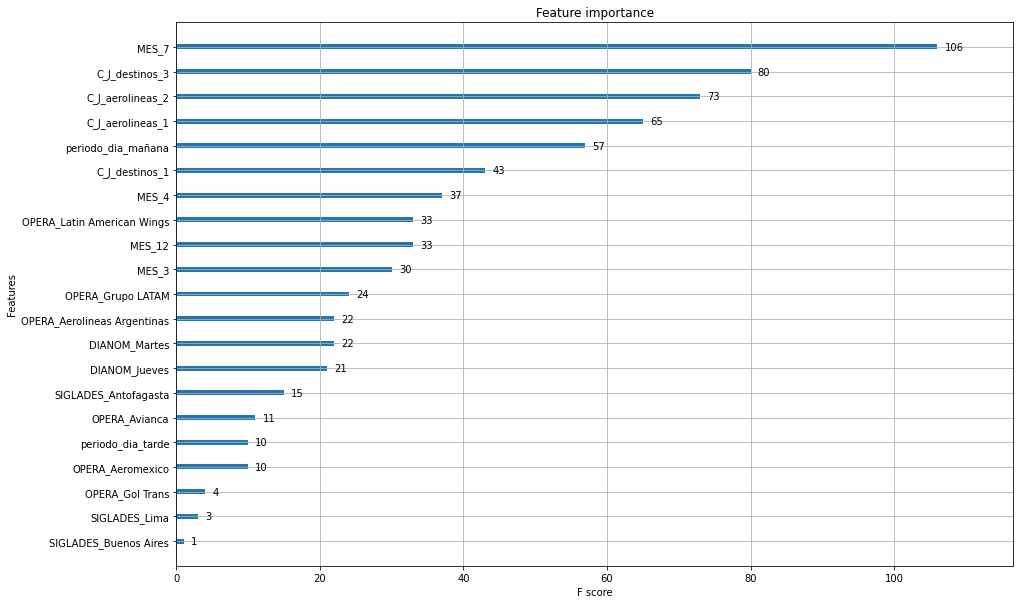

In [ ]:
plt.figure(figsize = (13,10))
plot_importance(modelxgb)

Este gráfico de importancia será utilizado más adelante para discriminar el uso de las variables y no usarlas todas.